# Another Approach to Regression

While we have been using Least Squares methods to develop our predictions, we can take a different perspective.  Rather than saying the line of best fit is determined by the line that minimizes the sum of squares of distance, we can generate a line that will take on the value of the $n$ points nearest.  For example, if we have two observations as:

|   $~$ | $m1$  |  $m2$ | $m3$ |
| ---- | ----- | ----- | ----- |
| a   | 0.2 | 0.45 | 10 |
| b   | 3.2 | 5.4  | 14 | 


If we want to predict the value of $m3$ using $m1$ and $m2$, we simply find the nearest neighbors and assume their value for $m3$.  If we had a new observation as:

$$m1 = 1.0 \quad  \text{and} \quad m2 = 2.0$$

Now, these values are nearer to our observation $a$, so we predict the value of $m3$ as 10.  Here, we would use the Euclidean distance to make this decision.  

$$D = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$



We can use the Nearest Neighbors approach to consider our earlier problem involving finding the line of best fit for the `mtcars` dataset.  Now, we want to assign $y$-values based on the nearest $k$ neighbors.  Plotting the result of two iterations with different values for $k$ demonstrates the effect of changing the number of neighbors.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
mtcars = pd.read_csv('data/mtcars.csv')

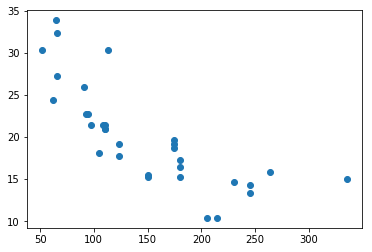

In [3]:
plt.scatter(mtcars['hp'], mtcars['mpg'])

In [4]:
from sklearn.neighbors import KNeighborsRegressor

In [5]:
X = mtcars['hp'].values.reshape(-1,1)
y = mtcars['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
regress = KNeighborsRegressor(n_neighbors=5)
regress2 = KNeighborsRegressor(n_neighbors=20)

In [7]:
regress.fit(X_train, y_train)
regress2.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=20, p=2,
          weights='uniform')

In [8]:
pred_5 = regress.predict(X_test)
pred_20 = regress2.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
print('Error with 5 is', np.sqrt(mean_squared_error(pred_5, y_test)), 'and 20 is', np.sqrt(mean_squared_error(pred_20, y_test)))

Error with 5 is 4.53403242158677 and 20 is 6.228516827865202


In [11]:
x = mtcars.sort_values('hp')
y2 = regress.predict(x['hp'].values.reshape(-1,1))
y3 = regress2.predict(x['hp'].values.reshape(-1,1))

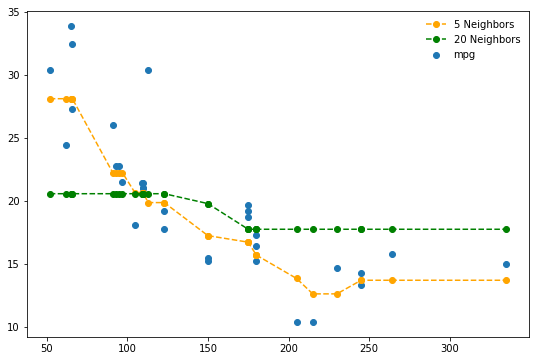

In [12]:
plt.figure(figsize = (9, 6))
plt.scatter(mtcars['hp'], mtcars['mpg']);
plt.plot(x['hp'], y2, '--o', color = 'orange', label = '5 Neighbors');
plt.plot(x['hp'], y3, '--o', color = 'green', label = '20 Neighbors');
plt.legend(frameon = False)

### Searching for Neighbors

For the KNN algorithm, we can use the `GridSearchCV` to search for the ideal number of neighbors.  Below, we will look at possible degree for the polynomial, searching from 2 to 13.

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
params = {'n_neighbors': [i for i in range(2, 14)]}

In [15]:
grid = GridSearchCV(KNeighborsRegressor(), param_grid=params, scoring = 'neg_mean_squared_error')

In [16]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [17]:
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [22]:
best = grid.best_estimator_

In [23]:
best.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [24]:
pred = best.predict(X_test)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [27]:
print("With KNNeighbors: {:.2f}".format(np.sqrt(mean_squared_error(pred, y_test))), "\nLinear Regression with OLS: {:.2f}".format(np.sqrt(mean_squared_error(pred_lr, y_test))))

With KNNeighbors: 3.99 
Linear Regression with OLS: 5.90


### KNN and Classification

Rather than making a numerical prediction about a quantities value, we may want to make a prediction about class inclusion.  For example, the dataset below gives us measurements on four different kinds of flowers, as well as the appropriate class.  The question involves being able to use the measurements to identify a **type**.  KNN will also work here.

In [18]:
from sklearn.datasets import load_iris

In [19]:
iris = load_iris()

In [20]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [21]:
X = iris.data
y = iris.target
y[::10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [26]:
pred

array([2, 1, 0, 1, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1,
       0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0])

In [28]:
knn.score(X_test, y_test)

0.9736842105263158

In [27]:
y_test

array([2, 1, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1,
       0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0])

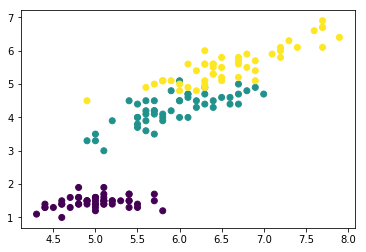

In [29]:
plt.scatter(X[:, 0], X[:, 2], c = y)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, pred)

0.9736842105263158